In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from tensorflow.keras.datasets.mnist import load_data
(train_x, train_y), (test_x, test_y) = load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [3]:
len(test_x)

10000

(28, 28)


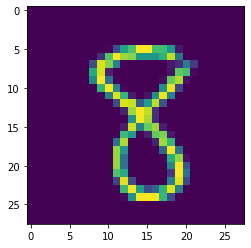

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_x[144])
print(train_x[144].shape)

In [5]:
train_x = train_x / 255
test_x = test_x / 255

In [6]:
train_x.shape

(60000, 28, 28)

In [18]:
train_x0 = np.resize(train_x, (60000, 28, 28, 1))

In [19]:
test_x0 = np.resize(test_x, (10000, 28, 28, 1))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [21]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1,)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='acc')

In [23]:
hist = model.fit(train_x0, train_y, epochs=4, batch_size=16, validation_split=0.2)

Epoch 1/4


2022-12-29 05:33:36.619053: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3000/3000 [==============================] - 18s 4ms/step - loss: 0.1542 - acc: 0.9524 - val_loss: 0.0493 - val_acc: 0.9846
Epoch 2/4
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0521 - acc: 0.9845 - val_loss: 0.0461 - val_acc: 0.9883
Epoch 3/4
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0380 - acc: 0.9887 - val_loss: 0.0377 - val_acc: 0.9894
Epoch 4/4
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0299 - acc: 0.9908 - val_loss: 0.0377 - val_acc: 0.9892


In [24]:
model.evaluate(test_x0, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0330 - acc: 0.9901


[0.032990962266922, 0.9901000261306763]

In [25]:
model.save('mnist-cnn')

2022-12-29 05:34:35.990436: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [26]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('mnist-cnn') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('mnist-cnn.model.tflite', 'wb') as f:
  f.write(tflite_model)

2022-12-29 05:34:43.345874: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2022-12-29 05:34:43.345913: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2022-12-29 05:34:43.345926: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored change_concat_input_ranges.
2022-12-29 05:34:43.346772: I tensorflow/cc/saved_model/reader.cc:38] Reading SavedModel from: mnist-cnn
2022-12-29 05:34:43.350551: I tensorflow/cc/saved_model/reader.cc:90] Reading meta graph with tags { serve }
2022-12-29 05:34:43.350599: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: mnist-cnn
2022-12-29 05:34:43.361639: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-29 05:34:43.421461: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: mnist-cnn
2022-12-29 05:34:43.4316